In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta
from pycaret.regression import *

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('Variavel_sep.xlsx', sheet_name='LookerStudio')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeça  \
888    NaN  830.17               35.3                28.3                 9.3   
889    NaN  756.44               34.0                27.5                 9.7   
890    NaN  600.67               32.0                29.7                 8.5   
891    NaN  830.18               34.5                28.3                 9.5   
892    NaN  888.25               34.1                27.5                 9.1   
893    NaN  683.54               30.0                28.8                 8.0   
894    NaN  841.54               33.1                29.3                 9.1   
895    NaN  666.60               31.5                26.4                 8.9   
896    NaN  798.02               34.0                28.3                 9.3   
897    NaN  739.16               32.0                27.1                 9.0   

     altura  espessura  
888    10.3        3.4  
889    10.9        3.3  
890     9.4        3.4  
891    1

In [3]:
def drop_columns(df):
    """
    Drops the specified columns from the DataFrame and returns the resulting DataFrame.
    Also prints the first few rows of the resulting DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    pd.DataFrame: The DataFrame after dropping the specified columns.
    """
    columns_to_drop = ['espessura', 'Index']
    df = df.drop(columns=columns_to_drop)
    return df

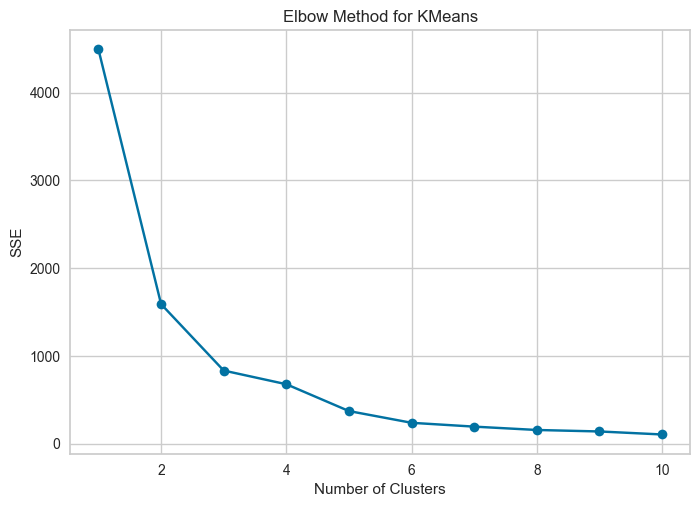

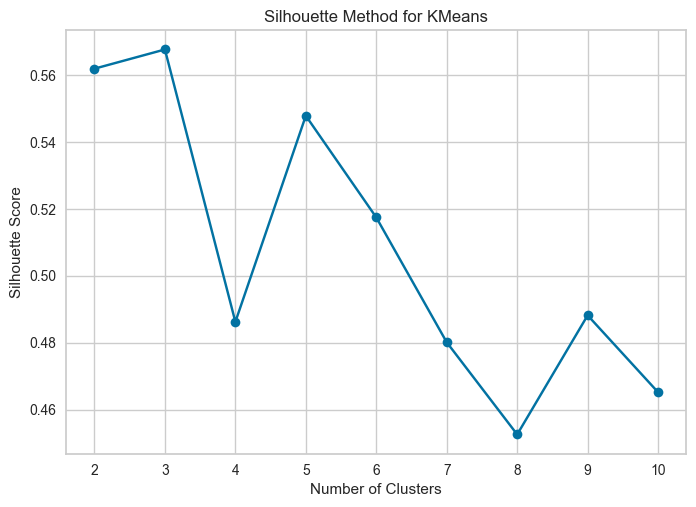

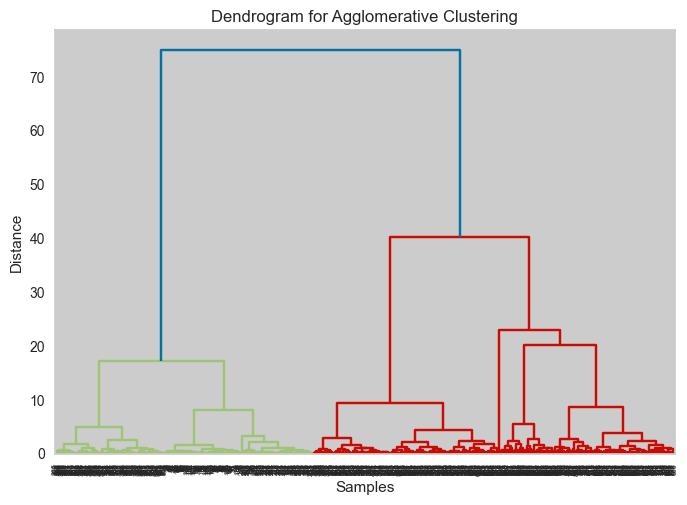

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load your data
data = df.copy()
data = drop_columns(data)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Elbow Method for KMeans
def kmeans_elbow_method(data, max_clusters=10):
    sse = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(range(1, max_clusters+1), sse, marker='o')
    plt.title('Elbow Method for KMeans')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()

# Silhouette Method for KMeans
def kmeans_silhouette_method(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    plt.figure()
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.title('Silhouette Method for KMeans')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Dendrogram for Agglomerative Clustering
def plot_dendrogram(data):
    Z = linkage(data, 'ward')
    plt.figure()
    dendrogram(Z)
    plt.title('Dendrogram for Agglomerative Clustering')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

# Determine optimal eps for DBSCAN
def optimal_eps(data, min_samples=5):
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances[:,1], axis=0)
    plt.figure()
    plt.plot(distances)
    plt.title('Elbow Method for Optimal eps (DBSCAN)')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

# Determine optimal number of clusters for KMeans and Agglomerative Clustering
kmeans_elbow_method(data_scaled)
kmeans_silhouette_method(data_scaled)
plot_dendrogram(data_scaled)
#optimal_eps(data_scaled)


In [8]:
# Based on the plots, choose the best number of clusters or eps value for each algorithm
best_n_clusters_kmeans = 2  # Replace with your determined number based on results before
best_n_clusters_agg = 2     # Replace with your determined number based on results before
#best_eps_dbscan = 0.5       # Replace with your determined eps based on results before

# Apply the clustering algorithms with the chosen parameters
kmeans = KMeans(n_clusters=best_n_clusters_kmeans)
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters_agg)
#dbscan = DBSCAN(eps=best_eps_dbscan, min_samples=5)

# Fit the models and store the labels
labels_kmeans = kmeans.fit_predict(data_scaled)
labels_agg = agg_clustering.fit_predict(data_scaled)
#labels_dbscan = dbscan.fit_predict(data_scaled)

#Print the labels
print("KMeans Labels:", labels_kmeans)
print("Agglomerative Clustering Labels:", labels_agg)
#print("DBSCAN Labels:", labels_dbscan)

KMeans Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 1

Algorithm: KMeans
  Silhouette Score: 0.5619512750223788
  Davies-Bouldin Score: 0.5947173362948138

Algorithm: AgglomerativeClustering
  Silhouette Score: 0.5654370795513972
  Davies-Bouldin Score: 0.5570655832287812

Algorithm: DBSCAN
  Silhouette Score: 0.5659460934424629
  Davies-Bouldin Score: 1.9398545814069668

Algorithm: MeanShift
  Silhouette Score: 0.506099751071491
  Davies-Bouldin Score: 0.374077537192348

Algorithm: SpectralClustering
  Silhouette Score: 0.8501806137037877
  Davies-Bouldin Score: 0.10990204120577259



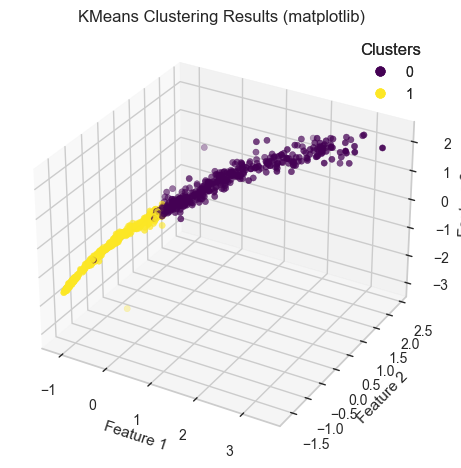

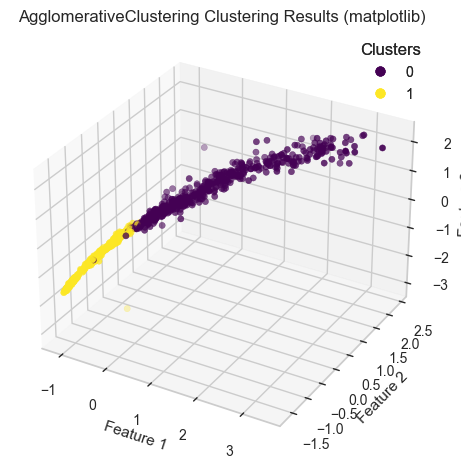

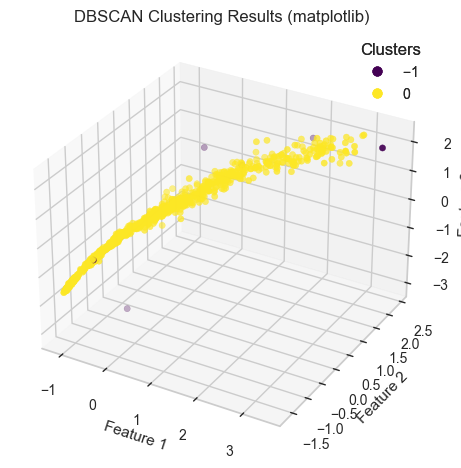

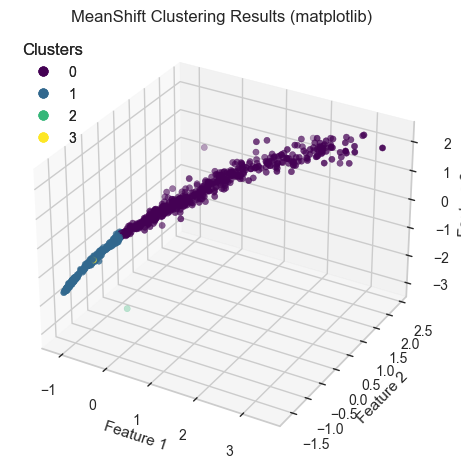

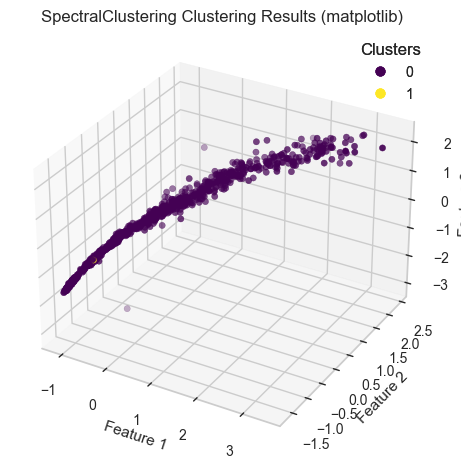

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Load your data e drop the columns non-numeric
data = df.copy()
data = drop_columns(data)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define the clustering algorithms
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=2),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=2),
    #'DBSCAN': DBSCAN(eps=0.5, min_samples=2),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=2)
}

# Dictionary to store the results
results = {}

# Evaluate each clustering algorithm
for name, algorithm in clustering_algorithms.items():
    # Fit the model
    labels = algorithm.fit_predict(data_scaled)
    
    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(data_scaled, labels)
    davies_bouldin = davies_bouldin_score(data_scaled, labels)
    
    # Store the results
    results[name] = {'Labels': labels, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Score': davies_bouldin}

# Print the results
for name, metrics in results.items():
    print(f"Algorithm: {name}")
    for metric, value in metrics.items():
        if metric != 'Labels':
            print(f"  {metric}: {value}")
    print()

# 3D Visualization using matplotlib
def plot_3d(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    plt.show()

# 3D Visualization using plotly
def plotly_3d(data, labels, title):
    fig = px.scatter_3d(
        x=data[:, 0], y=data[:, 1], z=data[:, 2],
        color=labels,
        title=title,
        labels={'x': 'Feature 1', 'y': 'Feature 2', 'z': 'Feature 3'},
        color_continuous_scale='Viridis'
    )
    fig.show()

# Plotting results for each algorithm
for name, metrics in results.items():
    labels = metrics['Labels']
    plot_3d(data_scaled, labels, f'{name} Clustering Results (matplotlib)')
    plotly_3d(data_scaled, labels, f'{name} Clustering Results (plotly)')


In [7]:
# Divinding using VMT
# Dividing by section (100 grams) sem#
# Evaluate features of each cluster(100 grams)